In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [4]:
insurance_data = pd.read_csv("D:/dataset/insurance.csv")

In [5]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data_new = insurance_data

In [7]:
insurance_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
Premium     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
insurance_data_new.describe()

,age,bmi,children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance_data_new.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
Premium     0
dtype: int64

In [10]:
insurance_data_new["gender"].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [11]:
insurance_data_new["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

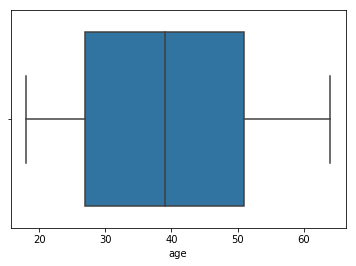

In [12]:
sns.boxplot(insurance_data_new["age"])

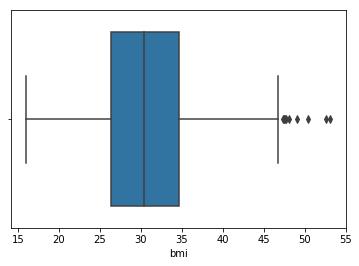

In [13]:
sns.boxplot(insurance_data_new["bmi"])

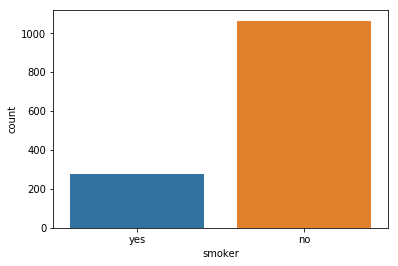

In [14]:
sns.countplot(insurance_data_new["smoker"])

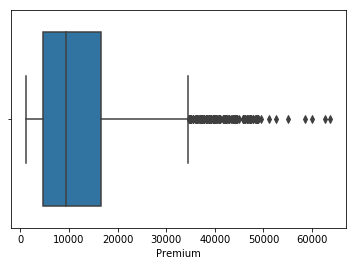

In [15]:
sns.boxplot(insurance_data_new["Premium"])

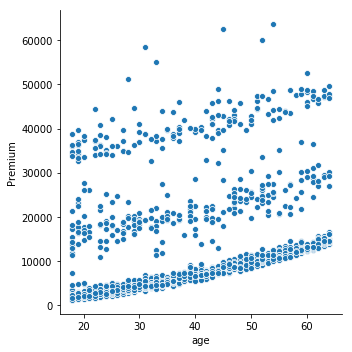

In [16]:
sns.relplot(x="age",y="Premium",data=insurance_data_new)

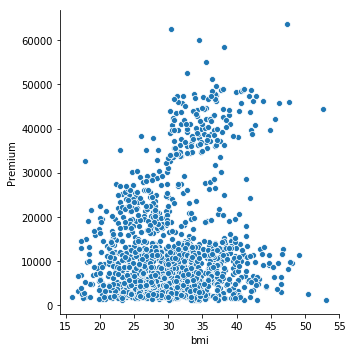

In [17]:
sns.relplot(x="bmi",y="Premium",data=insurance_data_new)

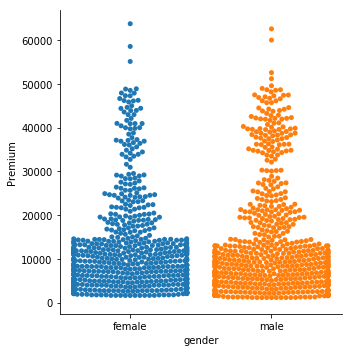

In [18]:
sns.catplot(x="gender",y="Premium",data=insurance_data_new,kind='swarm')

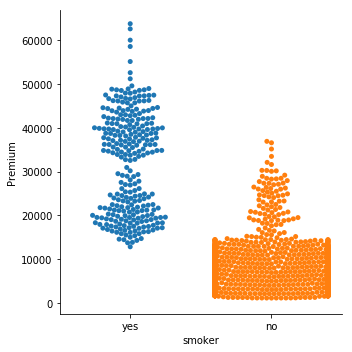

In [19]:
sns.catplot(x="smoker",y="Premium",data=insurance_data_new,kind='swarm')

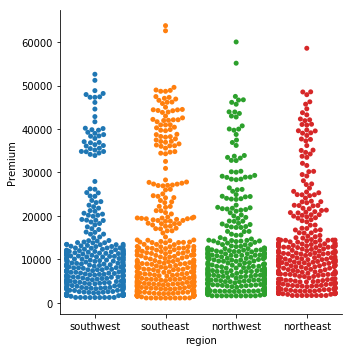

In [20]:
sns.catplot(x="region",y="Premium",data=insurance_data_new,kind='swarm')

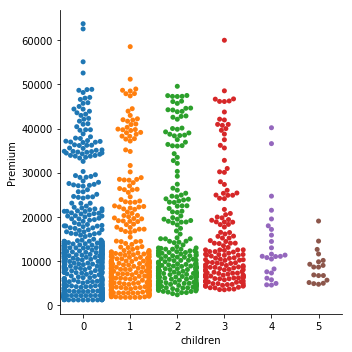

In [22]:
sns.catplot(x="children",y="Premium",data=insurance_data_new,kind='swarm')

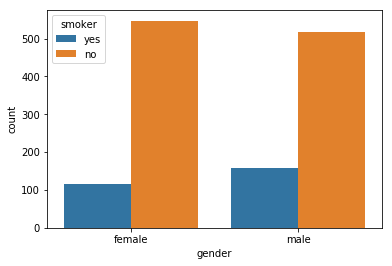

In [26]:
sns.countplot(insurance_data_new["gender"],hue=insurance_data_new["smoker"])

In [25]:
insurance_data_new["gender"].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [27]:
insurance_data_new.corr()

,age,bmi,children,Premium
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
Premium,0.299008,0.198341,0.067998,1.000000


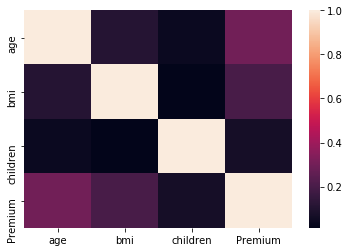

In [28]:
sns.heatmap(insurance_data_new.corr())

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

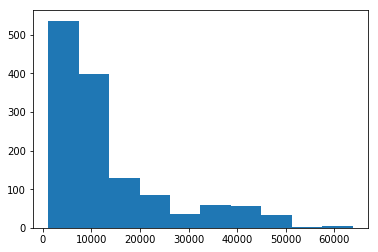

In [29]:
plt.hist(insurance_data_new["Premium"])

In [31]:
insurance_data_new["Premium"]=np.log(insurance_data_new["Premium"])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <a list of 10 Patch objects>)

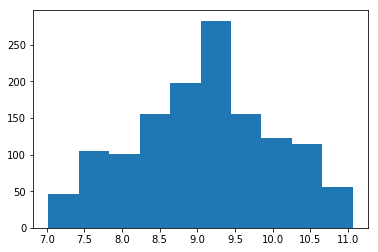

In [34]:
plt.hist(insurance_data_new["Premium"])

In [41]:
Q1,Q3=np.percentile(insurance_data_new["bmi"],[25,75])
IQR=Q3-Q1
upper = Q3+(1.5*IQR)
lower= Q1-(1.5*IQR)
print(upper,lower)

47.290000000000006 13.7


In [43]:
insurance_data_new[insurance_data_new["bmi"]>47.29]

,age,gender,bmi,children,smoker,region,Premium
116,58,male,49.06,0,no,southeast,9.339729
286,46,female,48.07,2,no,northeast,9.151962
401,47,male,47.52,1,no,southeast,8.997632
543,54,female,47.41,0,yes,southeast,11.063045
847,23,male,50.38,1,no,southeast,7.798956
860,37,female,47.60,2,yes,southwest,10.738861
1047,22,male,52.58,1,yes,southeast,10.703276
1088,52,male,47.74,1,no,southeast,9.184911
1317,18,male,53.13,0,no,southeast,7.059156


In [37]:
print(Q1,Q3)

17.2275375 17.6726125


In [44]:
insurance_data_new.columns.tolist()

['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'Premium']

In [45]:
features = insurance_data_new[['age', 'gender', 'bmi', 'children', 'smoker', 'region']]

In [46]:
target = insurance_data_new["Premium"]

In [47]:
features.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [48]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [50]:
features["children"] = features["children"].astype("category")

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null category
smoker      1338 non-null object
region      1338 non-null object
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 53.9+ KB


In [55]:
features=pd.get_dummies(features,drop_first=True)

In [73]:
features.head(2)

,age,bmi,gender_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,0,0,0,0,1,0,0,1
1,18,33.77,1,1,0,0,0,0,0,0,1,0


In [74]:
features= sm.add_constant(features)

In [75]:
features.head(2)

,const,age,bmi,gender_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.90,0,0,0,0,0,0,1,0,0,1
1,1.0,18,33.77,1,1,0,0,0,0,0,0,1,0


In [56]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3)

In [77]:
x_train.shape

(936, 13)

In [78]:
x_test.shape

(402, 13)

In [60]:
import statsmodels.api as sm

In [79]:
linear_regression = sm.OLS(y_train,x_train).fit()

In [87]:
np.exp(0.678)

1.9699339218909298

In [80]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          3.62e-282
Time:                        16:29:45   Log-Likelihood:                -582.25
No. Observations:                 936   AIC:                             1191.
Df Residuals:                     923   BIC:                             1253.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9996      0.088     79.495      0.000       6.827       7.172
age                  0.0349      0.001     32.819      0.000       0.033       0.037
bmi                  0.0130      0.003      5.029      0.000       0.008       0.018
gender_male         -0.0673      0.030     -2.255      0.024      -0.126      -0.009
children_1           0.1399      0.037      3.741      0.000       0.067       0.213
children_2           0.2728      0.043      6.363      0.000       0.189       0.357
children_3           0.2529      0.050      5.077      0.000       0.155       0.351
children_4           0.5090      0.110      4.647      0.000       0.294       0.724
children_5           0.4412      0.129      3.430      0.001       0.189       0.694
smoker_yes           1.5564      0.037     42.530      0.000       1.485       1.628
region_northwest    -0.0551      0.043     -1.286      0.199      -0.139       0.029
region_southeast    -0.1466      0.043     -3.442      0.001      -0.230      -0.063
region_southwest    -0.0984      0.043     -2.276      0.023      -0.183      -0.014
==============================================================================
Omnibus:                      327.047   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.929
Skew:                           1.674   Prob(JB):                    3.62e-252
Kurtosis:                       7.298   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
premium_prediction = linear_regression.predict(x_test)

In [82]:
premium_prediction.head(10)

376     10.491915
552      9.273241
1010     8.870713
537      9.169991
10       8.144477
1107     9.300976
559      8.001155
388      8.144592
945      9.458412
56       9.707843
dtype: float64

In [83]:
residual = y_test-premium_prediction

(array([ 15.,  51., 145., 143.,   6.,  13.,  14.,   5.,   6.,   4.]),
 array([-0.85770708, -0.58649558, -0.31528409, -0.04407259,  0.2271389 ,
         0.49835039,  0.76956189,  1.04077338,  1.31198488,  1.58319637,
         1.85440786]),
 <a list of 10 Patch objects>)

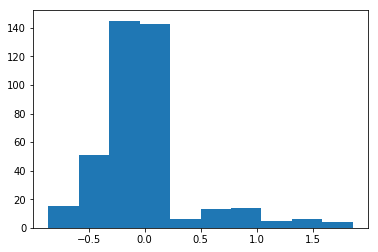

In [88]:
plt.hist(residual)

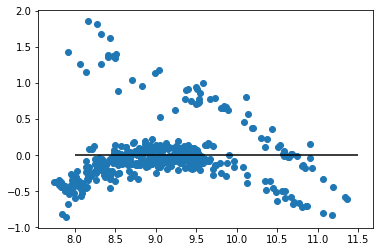

In [90]:
plt.scatter(premium_prediction,residual)
plt.hlines(0,8,11.5)

In [91]:
VIF=1/(1-(0.76**2))

In [92]:
VIF

2.3674242424242427

In [84]:
residual.head()

376    -0.508696
552     0.196160
1010    0.149561
537    -0.084637
10     -0.235605
dtype: float64

In [85]:
from statsmodels.tools.eval_measures import rmse

In [86]:
rmse(y_test,premium_prediction)

0.41669863507429133

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lm.coef_

array([ 0.03530034,  0.01092892, -0.07204089,  0.16501642,  0.32258962,
        0.26379467,  0.60106095,  0.36668194,  1.55544772, -0.07552626,
       -0.13066165, -0.1094394 ])

In [71]:
lm.intercept_

7.03597143203668